In [1]:
import gensim
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
from tqdm.notebook import tqdm
import numpy as np

In [5]:
tqdm.pandas()

In [6]:
corpus = pd.read_csv("cleaned_data.csv")

In [7]:
corpus.drop("Unnamed: 0", axis = 1, inplace = True)
corpus.dropna(subset = ["text"], inplace = True)
display(corpus)

,id,title,date,text,depressive
0,train_subject1095,NaN,2014-04-30 10:52:35,the last line is pretty much the same as the ...,True
1,train_subject1095,NaN,2014-04-30 10:25:52,on the flipside generic canned ravioli is jus...,True
2,train_subject1095,NaN,2014-04-30 10:23:26,at least make it illegal to perform on infant...,True
3,train_subject1095,NaN,2014-04-30 10:20:06,i feel like i am the only who has never seen ...,True
4,train_subject1095,NaN,2014-04-30 10:16:36,if anything it was an act of god for his chut...,True
...,...,...,...,...,...
295016,train_subject9974,NaN,2015-04-02 16:52:44,yeah i have known too many privates end up wi...,False
295017,train_subject9974,NaN,2015-04-02 16:14:56,i am a soldier i am regularly away from home ...,False
295018,train_subject9974,ELI5:the button,2015-04-02 04:15:51,please explain the button at rthebutton,False
295019,train_subject9974,NaN,2015-04-02 02:33:16,stars and stripes is reporting the same thing...,False


In [8]:
ps = PorterStemmer()

In [9]:
def stemmer(text):
    words = word_tokenize(text)
    stemmed_value = ""
    for word in words:
        stemmed_value += ps.stem(word)+" "
    return stemmed_value

In [10]:
corpus ["stemmed_text"] = corpus ["text"].progress_apply(lambda x: stemmer(x))

  0%|          | 0/295020 [00:00<?, ?it/s]

In [12]:
corpus.isnull().sum()

id                   0
title           198717
date                 0
text                 0
depressive           0
stemmed_text         0
dtype: int64

In [18]:
liwc_dictionary = {}

In [19]:
counter = 0
with open('LIWC2001_English.dic') as f:
    while True:
        line = f.readline()
        if not line:
            break
        if counter == 0:
            pass
        else:
            line_striped = line.strip()
            line_striped = line_striped.split()
            l1 = []
            reg_ex = re.compile(line_striped [0])
            for i in range(1, len(line_striped)):
                l1.append(int(line_striped[i]))                 
            liwc_dictionary [reg_ex] = l1
            
        counter += 1

In [20]:
liwc_dictionary

{re.compile(r'a', re.UNICODE): [9],
 re.compile(r'abandon*', re.UNICODE): [12, 16, 19, 20, 24],
 re.compile(r'abort*', re.UNICODE): [60, 61, 62],
 re.compile(r'about', re.UNICODE): [10],
 re.compile(r'above', re.UNICODE): [10, 41, 42],
 re.compile(r'abrupt*', re.UNICODE): [37],
 re.compile(r'absolut*', re.UNICODE): [26],
 re.compile(r'abuse*', re.UNICODE): [12, 16, 18],
 re.compile(r'abusive', re.UNICODE): [12, 16, 18],
 re.compile(r'academi*', re.UNICODE): [47, 48],
 re.compile(r'accept', re.UNICODE): [8, 12, 13, 15, 20, 22, 39],
 re.compile(r'accepta*', re.UNICODE): [8, 12, 13, 15],
 re.compile(r'accepted', re.UNICODE): [8, 12, 13, 15, 20, 38],
 re.compile(r'accepting', re.UNICODE): [8, 12, 13, 15, 20],
 re.compile(r'accepts', re.UNICODE): [8, 12, 13, 15, 20, 39],
 re.compile(r'accomplish*', re.UNICODE): [47, 50],
 re.compile(r'ache*', re.UNICODE): [12, 16, 60, 61],
 re.compile(r'achiev*', re.UNICODE): [20, 47, 50],
 re.compile(r'aching', re.UNICODE): [12, 16, 60, 61],
 re.compile(r'

In [21]:
liwc_categories = {}

In [22]:
counter2 = 0
with open('LIWC2001_Categories.txt') as f:
    while True:
        line = f.readline()
        if not line:
            break
        if counter2 == 0 or counter2 == 69:
            pass
        else:
            line_striped2 = line.strip()
            line_striped2 = line_striped2.split()
            
            l2 = []
            for i in range(1, len(line_striped2)):
                l2.append(line_striped2[i])                 
            liwc_categories[int(line_striped2 [0])] = l2
            
        counter2 += 1

In [23]:
print(liwc_categories)

{1: ['Pronoun@All', 'pronouns'], 2: ['I@1st', 'person', 'singular'], 3: ['We@1st', 'person', 'plural'], 4: ['Self@Total', '1st', 'person'], 5: ['You@Total', '2nd', 'person'], 6: ['Other@Total', '3rd', 'person'], 7: ['Negate@Negations'], 8: ['Assent@Assents'], 9: ['Article@Articles'], 10: ['Preps@Prepositions'], 11: ['Number@Numbers'], 12: ['Affect'], 13: ['Posemo@Positive', 'affect'], 14: ['Posfeel@Positive', 'feelings'], 15: ['Optim@Optimism'], 16: ['Negemo@Negative', 'affect'], 17: ['Anx@anxiety'], 18: ['Anger'], 19: ['Sad@Sadness'], 20: ['Cogmech@Cognition'], 21: ['Cause@Causation'], 22: ['Insight'], 23: ['Discrep@Discrepancy'], 24: ['Inhib@Inhibition'], 25: ['Tentat@Tentativeness'], 26: ['Certain@Certainty'], 27: ['Senses@Sensation/perception'], 28: ['See@Seeing'], 29: ['Hear@Hearing'], 30: ['Touch@Touching'], 31: ['Social'], 32: ['Comm@Communication'], 33: ['Othref@Reference', 'to', 'others'], 34: ['Friends'], 35: ['Family'], 36: ['Humans'], 37: ['Time'], 38: ['Past'], 39: ['Prese

In [24]:
def calc_first_person_pronouns(text):
    words = text.split(" ")
    self_prn_counter = 0
    for word in words:
        for key in liwc_dictionary.keys():
            result = key.match(word)
            if result != None:
                if 4 in liwc_dictionary [key]:
                    self_prn_counter += 1
    return self_prn_counter

In [25]:
corpus['first_person_pronoun_count'] = corpus ['text'].progress_apply(lambda x : calc_first_person_pronouns(x))

  0%|          | 0/295020 [00:00<?, ?it/s]

In [26]:
def calc_negations(text):
    words = text.split(" ")
    neg_counter = 0
    for word in words:
        for key in liwc_dictionary.keys():
            result = key.match(word)
            if result != None:
                if 7 in liwc_dictionary [key]:
                    neg_counter += 1
    return neg_counter

In [27]:
corpus['negations_count'] = corpus ['text'].progress_apply(lambda x : calc_negations(x))

  0%|          | 0/295020 [00:00<?, ?it/s]

In [29]:
def calc_negative_affects(text):
    words = text.split(" ")
    neg_counter = 0
    for word in words:
        for key in liwc_dictionary.keys():
            result = key.match(word)
            if result != None:
                if 16 in liwc_dictionary [key]:
                    neg_counter += 1
    return neg_counter

In [30]:
corpus['negative_affect_count'] = corpus ['text'].progress_apply(lambda x : calc_negative_affects(x))

  0%|          | 0/295020 [00:00<?, ?it/s]

In [31]:
def calc_anxeity(text):
    words = text.split(" ")
    neg_counter = 0
    for word in words:
        for key in liwc_dictionary.keys():
            result = key.match(word)
            if result != None:
                if 17 in liwc_dictionary [key]:
                    neg_counter += 1
    return neg_counter

In [32]:
corpus['anxiety_count'] = corpus ['text'].progress_apply(lambda x : calc_anxeity(x))

  0%|          | 0/295020 [00:00<?, ?it/s]

In [33]:
def calc_anger(text):
    words = text.split(" ")
    neg_counter = 0
    for word in words:
        for key in liwc_dictionary.keys():
            result = key.match(word)
            if result != None:
                if 18 in liwc_dictionary [key]:
                    neg_counter += 1
    return neg_counter

In [34]:
corpus['anger_count'] = corpus ['text'].progress_apply(lambda x : calc_anger(x))

  0%|          | 0/295020 [00:00<?, ?it/s]

In [35]:
def calc_sadness(text):
    words = text.split(" ")
    neg_counter = 0
    for word in words:
        for key in liwc_dictionary.keys():
            result = key.match(word)
            if result != None:
                if 19 in liwc_dictionary [key]:
                    neg_counter += 1
    return neg_counter

In [36]:
corpus['sadness_count'] = corpus ['text'].progress_apply(lambda x : calc_sadness(x))

  0%|          | 0/295020 [00:00<?, ?it/s]

In [37]:
def calc_death(text):
    words = text.split(" ")
    neg_counter = 0
    for word in words:
        for key in liwc_dictionary.keys():
            result = key.match(word)
            if result != None:
                if 59 in liwc_dictionary [key]:
                    neg_counter += 1
    return neg_counter

In [38]:
corpus['death_words_count'] = corpus ['text'].progress_apply(lambda x :calc_death(x))

  0%|          | 0/295020 [00:00<?, ?it/s]

In [42]:
corpus.to_csv("stemmed_text.csv", index = False)

In [40]:
display(corpus)

,id,title,date,text,depressive,stemmed_text,first_person_pronoun_count,negations_count,negative_affect_count,anxiety_count,anger_count,sadness_count,death_words_count
0,train_subject1095,NaN,2014-04-30 10:52:35,the last line is pretty much the same as the ...,True,the last line is pretti much the same as the f...,6,2,0,0,0,0,0
1,train_subject1095,NaN,2014-04-30 10:25:52,on the flipside generic canned ravioli is jus...,True,on the flipsid gener can ravioli is just as go...,1,0,1,0,1,0,0
2,train_subject1095,NaN,2014-04-30 10:23:26,at least make it illegal to perform on infant...,True,at least make it illeg to perform on infant wh...,4,1,0,0,0,0,0
3,train_subject1095,NaN,2014-04-30 10:20:06,i feel like i am the only who has never seen ...,True,i feel like i am the onli who ha never seen su...,2,1,0,0,0,0,0
4,train_subject1095,NaN,2014-04-30 10:16:36,if anything it was an act of god for his chut...,True,if anyth it wa an act of god for hi chute not ...,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295016,train_subject9974,NaN,2015-04-02 16:52:44,yeah i have known too many privates end up wi...,False,yeah i have known too mani privat end up with ...,1,1,1,0,1,0,0
295017,train_subject9974,NaN,2015-04-02 16:14:56,i am a soldier i am regularly away from home ...,False,i am a soldier i am regularli away from home f...,16,3,8,2,0,6,0
295018,train_subject9974,ELI5:the button,2015-04-02 04:15:51,please explain the button at rthebutton,False,pleas explain the button at rthebutton,0,0,0,0,0,0,0
295019,train_subject9974,NaN,2015-04-02 02:33:16,stars and stripes is reporting the same thing...,False,star and stripe is report the same thing hereh...,4,2,0,0,0,0,0


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
corrMatrix = corpus.corr()

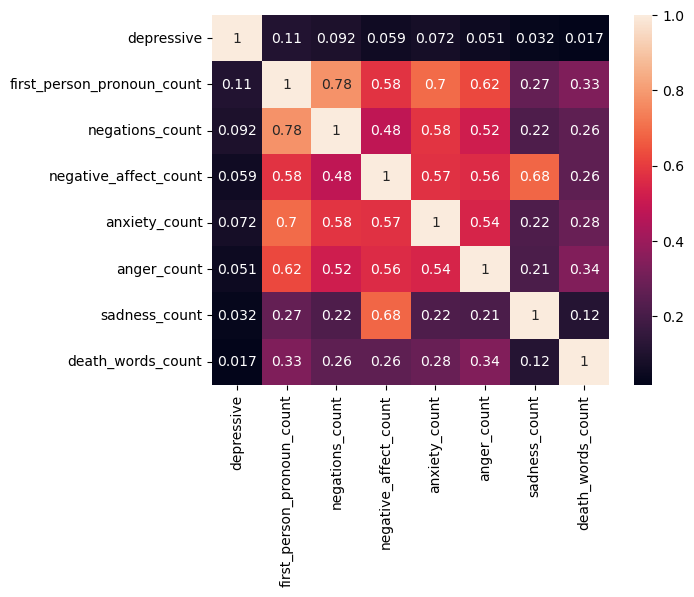

In [48]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [2]:
corpus = pd.read_csv("stemmed_text.csv")

In [4]:
corpus.isnull().sum()

id                                 0
title                         198717
date                               0
text                               0
depressive                         0
stemmed_text                   85038
first_person_pronoun_count         0
negations_count                    0
negative_affect_count              0
anxiety_count                      0
anger_count                        0
sadness_count                      0
death_words_count                  0
dtype: int64